In [291]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# import file
data = pd.read_csv('facies_vectors.csv')

# remove a test well
test_well = data[data['Well Name'] == 'SHANKLE']

# create a set of training wells without test well
training_wells = data[data['Well Name'] != 'SHANKLE']

# unique training well names
well_names = list(training_wells['Well Name'].unique())

In [185]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

# 1=sandstone  2=c_siltstone   3=f_siltstone  # 4=marine_silt_shale 
# 5=mudstone 6=wackestone 7=dolomite 8=packstone 9=bafflestone
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

facies_titles = ['sandstone', 'c_siltstone', 'f_siltstone', 'marine_silt_shale',
                'mudstone', 'wackestone', 'dolomite', 'packstone', 'bafflestone']

facies_color_map = dict(zip(facies_labels, facies_colors))

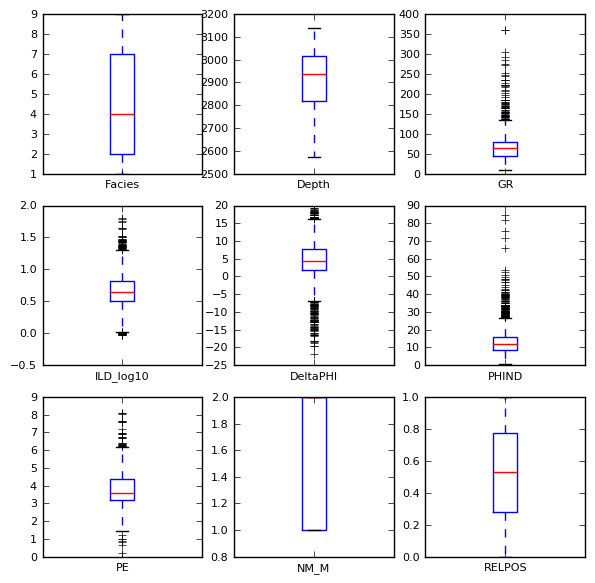

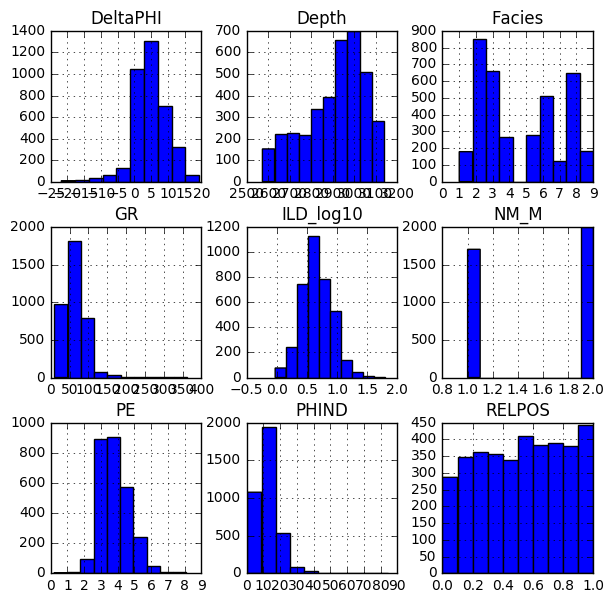

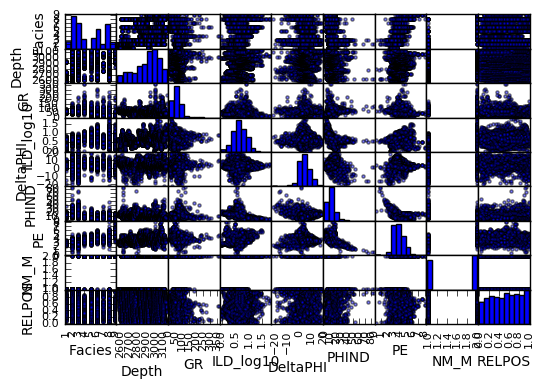

In [293]:
# describe the main statistical distribution of the input variables
training_wells.describe()

training_wells.groupby('Facies').size()

training_wells.plot(kind='box', subplots=True, layout=(3, 3), figsize=(7, 7), 
                    fontsize=8, sharex=False, sharey=False)
plt.show()

training_wells.hist(figsize=(7, 7))
plt.show()

scatter_matrix(training_wells)
plt.show()

In [58]:
# print out all the empty values
print(data.isnull().sum())

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
dtype: int64


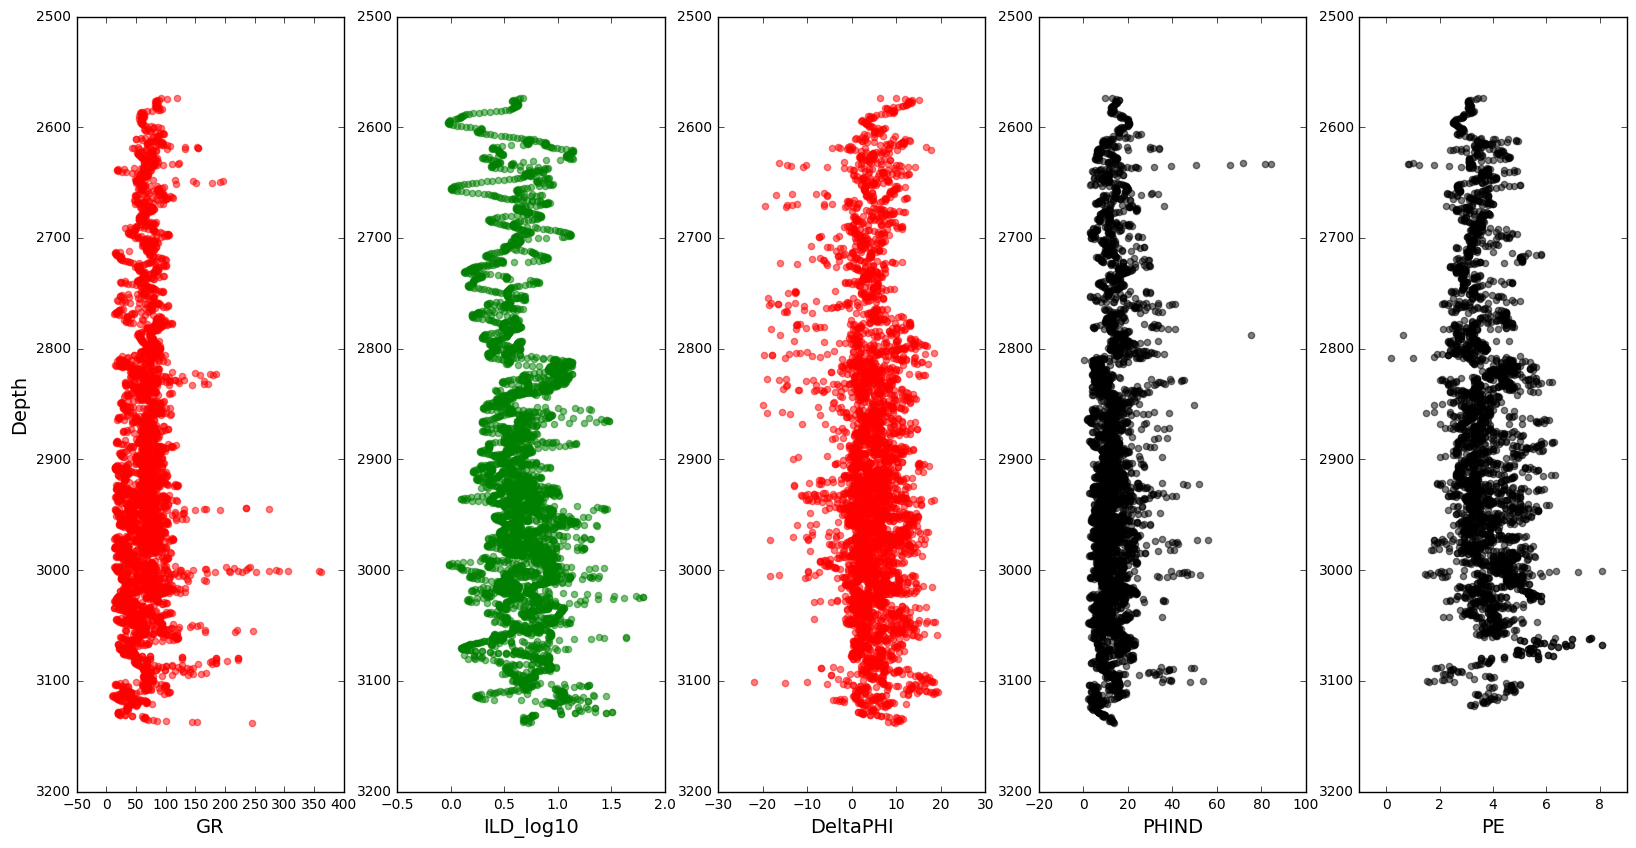

In [216]:
# ALL TRAINING WELLS
fig = plt.figure(figsize=(20, 10)) 

# (1, 5, 1) stands for (from, to, where)
ax1 = fig.add_subplot(1, 5, 1)
ax1.scatter(data['GR'], data['Depth'], color='r', alpha=0.5)
ax1.set_ylabel('Depth', fontsize = '14' )
ax1.set_xlabel('GR', fontsize = '14')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(1, 5, 2)
ax2.scatter(data['ILD_log10'], data['Depth'], color = 'g', alpha=0.5)
ax2.set_xlabel('ILD_log10', fontsize = '14')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(1, 5, 3)
ax3.scatter(data['DeltaPHI'], data['Depth'], color = 'r', alpha=0.5)
ax3.set_xlabel('DeltaPHI', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 4)
ax4.scatter(data['PHIND'], data['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PHIND', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 5)
ax4.scatter(data['PE'], data['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PE', fontsize = '14')
plt.gca().invert_yaxis()


plt.show()

In [243]:
# Lokking for GR extremums
num = 0
for i in training_wells['GR']:
    if i >= 150:
        print(i, facies_titles[data['Facies'][num]])
    num += 1
    
    

#num = 0
#for i in training_wells['GR']:
#    if i >= 150:
#        print('GR %d  -->  %d m  -->  %s' % (i, training_wells['Depth'][num], facies_titles[training_wells['Facies'][num]]))
#    num += 1

234.8 bafflestone
234.8 bafflestone
273.48 bafflestone
164.34 bafflestone
274.0 mudstone
358.74 mudstone
361.15 mudstone
227.99 mudstone
168.43 mudstone
159.61 mudstone
151.94 f_siltstone
154.37 f_siltstone
153.77 f_siltstone
195.89 bafflestone
191.22 bafflestone
177.59 bafflestone
151.13 bafflestone
165.0 wackestone
165.0 mudstone
172.0 mudstone
153.374 marine_silt_shale
245.36 marine_silt_shale
174.17 f_siltstone
184.021 f_siltstone
179.777 f_siltstone
158.331 f_siltstone
164.25 f_siltstone
168.375 marine_silt_shale
165.625 bafflestone
219.375 bafflestone
247.5 bafflestone
216.75 bafflestone
166.625 bafflestone
185.25 wackestone
222.5 f_siltstone
166.94 wackestone
235.25 mudstone
285.47 dolomite
305.87 dolomite
291.37 bafflestone
252.41 bafflestone
208.53 bafflestone
169.07 bafflestone


IndexError: list index out of range

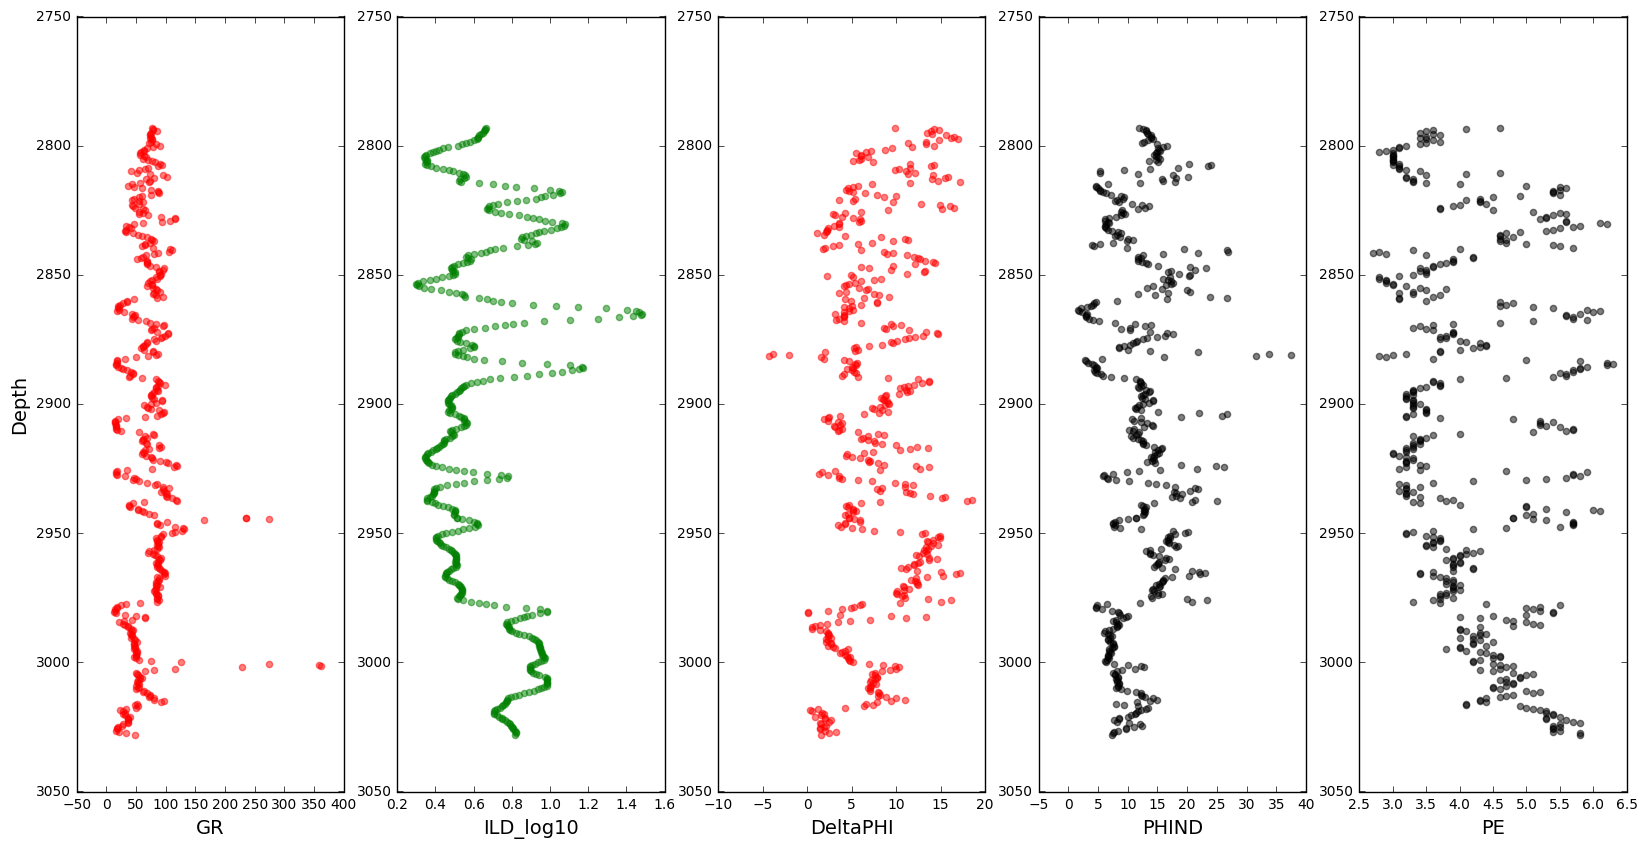

In [122]:
# SHRIMPLIN WELL
SW = data[data['Well Name'] == 'SHRIMPLIN']

fig = plt.figure(figsize=(20, 10)) 

# (1, 5, 1) stands for (from, to, where)
ax1 = fig.add_subplot(1, 5, 1)
ax1.scatter(SW['GR'], SW['Depth'], color='r', alpha=0.5)
ax1.set_ylabel('Depth', fontsize = '14' )
ax1.set_xlabel('GR', fontsize = '14')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(1, 5, 2)
ax2.scatter(SW['ILD_log10'], SW['Depth'], color = 'g', alpha=0.5)
ax2.set_xlabel('ILD_log10', fontsize = '14')
plt.gca().invert_yaxis()

ax3 = fig.add_subplot(1, 5, 3)
ax3.scatter(SW['DeltaPHI'], SW['Depth'], color = 'r', alpha=0.5)
ax3.set_xlabel('DeltaPHI', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 4)
ax4.scatter(SW['PHIND'], SW['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PHIND', fontsize = '14')
plt.gca().invert_yaxis()

ax4 = fig.add_subplot(1, 5, 5)
ax4.scatter(SW['PE'], SW['Depth'], color = 'k', alpha=0.5)
ax4.set_xlabel('PE', fontsize = '14')
plt.gca().invert_yaxis()


plt.show()

In [213]:
# SHRIMPLIN WELL: looking for the GR extremums, its Depth and Facies
num = 0
for i in SW['GR']:
    if i >= 150:
        print('GR %d --> %d m --> %s' % (i, float(SW['Depth'][num]), facies_titles[SW['Facies'][num]]))
    num += 1

GR 234 --> 2944 m --> bafflestone
GR 234 --> 2944 m --> bafflestone
GR 273 --> 2944 m --> bafflestone
GR 164 --> 2945 m --> bafflestone
GR 274 --> 3000 m --> mudstone
GR 358 --> 3001 m --> mudstone
GR 361 --> 3001 m --> mudstone
GR 227 --> 3002 m --> mudstone
